
# Introduction to data analysis and visualisation using python toolkits

# Introduction

This tutorial will go through how to use the pandas toolkit using python code. We will work with a sample dataset from the GapMinder project. You can view the data here:
https://gitlab.com/evan.edmond/gtc-coding-series/-/raw/master/01_audit_pandas/gapminder.csv

This tutorial also requires some basic understanding of programming using python. Here is a good introductory tutorial: https://swcarpentry.github.io/python-novice-inflammation/

## Note: DO NOT use this platform for confidential/patient data
For real analyses, install python and run it locally. This platform is mainly used for demonstration and learning.

This is a good guide to installing python on your computer https://youtu.be/9mAmZIRfJBs

# Tutorial
Let's get started!!!

But first, some housekeeping. Here we describe what the script is meant to do, and import the modules we need. Modules are blocks of code that are installed on our system that we can pull in as needed.

In [2]:
#!/usr/bin/env python3

# ^ this tells your computer what language the script is written in and
# what program to run it with

# GTC coding series tutorial
# Introduction to data analysis and visualisation using python toolkits
# 
# Evan Edmond March 2020


# importing modules that we will use
import pandas as pd                  # working with data in tables
# Import graphing modules
from matplotlib import pyplot as plt # plotting graphs
import seaborn as sns                # plotting pretty graphs

# Importing data

With pandas, there are pre-existing functions that can be used to read data in. You can input a file stored locally, or even data from various sources on the internet. Here we have previously uploaded the gapminder data to the gtc-coding series repository, so we can import it here.

The data is imported from a .csv file to a variable called df. Pandas handles data in structures called **DataFrames**. These have:
- rows and columns
- an **index** for each row
- a **label** for each column

![Schematic DataFrame](img/dataframe_scheme.png 'Schematic DataFrame')


These are similar to spreadsheets, but with a range of additional functions that we will describe.

In [3]:
# create a variable called df, and use the read_csv command to import the data
df = pd.read_csv('01_audit_pandas/gapminder.csv'
                , index_col=['year'])

# print a summary of the df DataFrame
df

Unnamed: 0      country continent  lifeExp       pop   gdpPercap
year                                                                  
1952           0  Afghanistan      Asia   28.801   8425333  779.445314
1957           1  Afghanistan      Asia   30.332   9240934  820.853030
1962           2  Afghanistan      Asia   31.997  10267083  853.100710
1967           3  Afghanistan      Asia   34.020  11537966  836.197138
1972           4  Afghanistan      Asia   36.088  13079460  739.981106
...          ...          ...       ...      ...       ...         ...
1987        1699     Zimbabwe    Africa   62.351   9216418  706.157306
1992        1700     Zimbabwe    Africa   60.377  10704340  693.420786
1997        1701     Zimbabwe    Africa   46.809  11404948  792.449960
2002        1702     Zimbabwe    Africa   39.989  11926563  672.038623
2007        1703     Zimbabwe    Africa   43.487  12311143  469.709298

[1704 rows x 6 columns]

Pandas also has functions to import data from excel, json, html, R, SPSS and other formats.

The documentation page for pandas functions to import data : https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

# Selecting values in a DataFrame

Here we select the rows corresponding to Afghanistan using the .loc function.

In [8]:
afg = df.loc[df['country'] == 'Afghanistan']

afg

Unnamed: 0      country continent  lifeExp       pop   gdpPercap
year                                                                  
1952           0  Afghanistan      Asia   28.801   8425333  779.445314
1957           1  Afghanistan      Asia   30.332   9240934  820.853030
1962           2  Afghanistan      Asia   31.997  10267083  853.100710
1967           3  Afghanistan      Asia   34.020  11537966  836.197138
1972           4  Afghanistan      Asia   36.088  13079460  739.981106
1977           5  Afghanistan      Asia   38.438  14880372  786.113360
1982           6  Afghanistan      Asia   39.854  12881816  978.011439
1987           7  Afghanistan      Asia   40.822  13867957  852.395945
1992           8  Afghanistan      Asia   41.674  16317921  649.341395
1997           9  Afghanistan      Asia   41.763  22227415  635.341351
2002          10  Afghanistan      Asia   42.129  25268405  726.734055
2007          11  Afghanistan      Asia   43.828  31889923  974.580338

You can select rows by a huge range of criteria. 

Let's make a very quick plot of Afghanistan's life expectancy over time

year
1952    28.801
1957    30.332
1962    31.997
1967    34.020
1972    36.088
1977    38.438
1982    39.854
1987    40.822
1992    41.674
1997    41.763
2002    42.129
2007    43.828
Name: lifeExp, dtype: float64


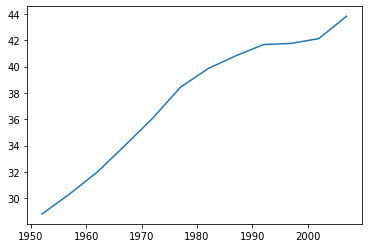

In [5]:
print(afg['lifeExp'])

plt.plot(afg['lifeExp'])

# Selecting columns

Selecting individual columns is easy with pandas. Here we select population data only.

In [9]:
pop = df[['country', 'pop']]
pop

country       pop
year                       
1952  Afghanistan   8425333
1957  Afghanistan   9240934
1962  Afghanistan  10267083
1967  Afghanistan  11537966
1972  Afghanistan  13079460
...           ...       ...
1987     Zimbabwe   9216418
1992     Zimbabwe  10704340
1997     Zimbabwe  11404948
2002     Zimbabwe  11926563
2007     Zimbabwe  12311143

[1704 rows x 2 columns]

# Combining row and column selections

Now suppose we only want population data from Asian countries. 
We can combine the two previous steps to select this subset of the data.


In [10]:
asiapop = df.loc[df['continent'] == 'Asia'][['country', 'pop']]
asiapop

country       pop
year                       
1952  Afghanistan   8425333
1957  Afghanistan   9240934
1962  Afghanistan  10267083
1967  Afghanistan  11537966
1972  Afghanistan  13079460
...           ...       ...
1987  Yemen, Rep.  11219340
1992  Yemen, Rep.  13367997
1997  Yemen, Rep.  15826497
2002  Yemen, Rep.  18701257
2007  Yemen, Rep.  22211743

[396 rows x 2 columns]

We may want to plot the change in population over time for each country. This is pretty straightforward to accomplish, but doesn't really look that nice, or capture the full complexity of the change over time in our dataset. Later we will return to how to visualize all the variables in our dataset over time.

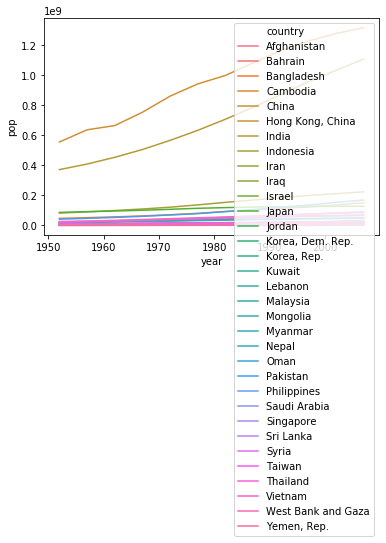

In [8]:
s = sns.lineplot(x=asiapop.index, y='pop', hue='country', data=asiapop)

# Making new columns / performing operations on data

Suppose we have to process our data in some way. Imagine some arbitrary development index that has the formula:

`Development Index = (Life expectancy^2 + GDP per capita) / 17` 

We can make a new column from the existing columns in our DataFrame. You will see that this has been appended on the right of the table. 

In [11]:
df['developIndex'] = (df['lifeExp']**2 + df['gdpPercap']) / 17

df

Unnamed: 0      country continent  lifeExp       pop   gdpPercap  \
year                                                                     
1952           0  Afghanistan      Asia   28.801   8425333  779.445314   
1957           1  Afghanistan      Asia   30.332   9240934  820.853030   
1962           2  Afghanistan      Asia   31.997  10267083  853.100710   
1967           3  Afghanistan      Asia   34.020  11537966  836.197138   
1972           4  Afghanistan      Asia   36.088  13079460  739.981106   
...          ...          ...       ...      ...       ...         ...   
1987        1699     Zimbabwe    Africa   62.351   9216418  706.157306   
1992        1700     Zimbabwe    Africa   60.377  10704340  693.420786   
1997        1701     Zimbabwe    Africa   46.809  11404948  792.449960   
2002        1702     Zimbabwe    Africa   39.989  11926563  672.038623   
2007        1703     Zimbabwe    Africa   43.487  12311143  469.709298   

      developIndex  
year                
1952     94.643701  
1957    102.404897  
1962    110.406395  
1967    117.268090  
1972    120.136756  
...            ...  
1987    270.223795  
1992    255.223701  
1997    175.501908  
2002    133.597573  
2007    138.872263  

[1704 rows x 7 columns]

# Grouping data

Suppose we want to group our data by continent, and find the mean value of each of our metrics for each continent in the year 2007.

First we need to select the rows corresponding to year 2007. Year is our index for this dataframe so this is pretty easy using the .loc function.

Note that because the index is numerical in this case, we give a raw number as our index and not a value within quotes, which is read as a `'string'`.



In [12]:
df2007 = df.loc[2007]
df2007

Unnamed: 0             country continent  lifeExp       pop  \
year                                                                
2007          11         Afghanistan      Asia   43.828  31889923   
2007          23             Albania    Europe   76.423   3600523   
2007          35             Algeria    Africa   72.301  33333216   
2007          47              Angola    Africa   42.731  12420476   
2007          59           Argentina  Americas   75.320  40301927   
...          ...                 ...       ...      ...       ...   
2007        1655             Vietnam      Asia   74.249  85262356   
2007        1667  West Bank and Gaza      Asia   73.422   4018332   
2007        1679         Yemen, Rep.      Asia   62.698  22211743   
2007        1691              Zambia    Africa   42.384  11746035   
2007        1703            Zimbabwe    Africa   43.487  12311143   

         gdpPercap  developIndex  
year                              
2007    974.580338    170.321995  
2007   5937.029526    692.794380  
2007   6223.367465    673.576592  
2007   4797.231267    389.598213  
2007  12779.379640   1085.440120  
...            ...           ...  
2007   2441.576404    467.911200  
2007   3025.349798    495.067052  
2007   2280.769906    365.400536  
2007   1271.211593    180.447944  
2007    469.709298    138.872263  

[142 rows x 7 columns]


Then, we group by continent using the groupby() command. Here we've grouped our data from year 2007. selected three columns, and called the function that generates descriptive statistics to summarize the data - generating count, mean, standard deviation and percentiles for each group (continent).

In [15]:
df2007.groupby('continent')[['lifeExp', 'pop','gdpPercap']].mean()

lifeExp           pop     gdpPercap
continent                                       
Africa     54.806038  1.787576e+07   3089.032605
Americas   73.608120  3.595485e+07  11003.031625
Asia       70.728485  1.155138e+08  12473.026870
Europe     77.648600  1.953662e+07  25054.481636
Oceania    80.719500  1.227497e+07  29810.188275

# Putting the data in context

What we have done so far may be all you need for a clinical audit. For most audits you will need to:
- import data
- clean up data
- select parts of data
- group data
- perform basic statistics

But after this, you will want to visually represent your findings. **This is not a comprehensive tutorial**, but let's take a moment to generate some eye-candy :D

One commonly used toolkit is `matplotlib`, which we imported earlier. Here are some tutorials for matplotlib: https://matplotlib.org/3.1.1/tutorials/index.html

Another one that builds on top of `matplotlib` and is capable of more sophisticated (and PRETTY) graphing is `seaborn`, which has a tutorial here: https://elitedatascience.com/python-seaborn-tutorial

But let's do a quick taster ourselves:

First of all, let's plot the relationship between GDP and life expectancy for values from 2007 - we can make the size of the points represent the population of each country, and colour code them according to continent.

For each command from these toolkits, there is generally a corresponding documentation page detailing the options, with examples of usage. For the `sns.scatterplot()` command, the documentation is found at https://seaborn.pydata.org/generated/seaborn.scatterplot.html

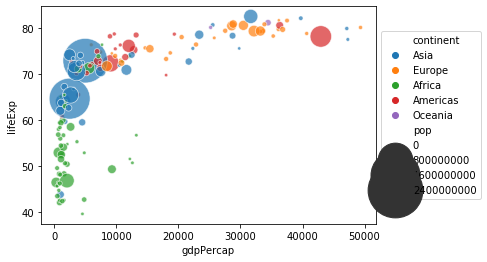

In [16]:
# Call the seaborn scatterplot() function to generate a graph
s = sns.scatterplot(x='gdpPercap', y='lifeExp', size='pop'
                    , hue='continent', data=df2007, sizes=(10, 3000)
                    , size_norm=(1, 2000000000), alpha=0.7)

# I've split the method call over multiple lines instead of 
# one very long one. Making code easier to read is encouraged
# in python


# configure legend
s.legend(loc='center left', bbox_to_anchor=(1, 0.5))

That's cool! Can you identify China, India and the USA?

But we also have data from different time points. 

We can write a **loop** - a command that repeatedly executes some code under a certain set of conditions, to generate a separate graph for data from each year. In this case we have used a `for` loop.

Don't worry too much about the details of the code, this is intended to illustrate the concepts. 

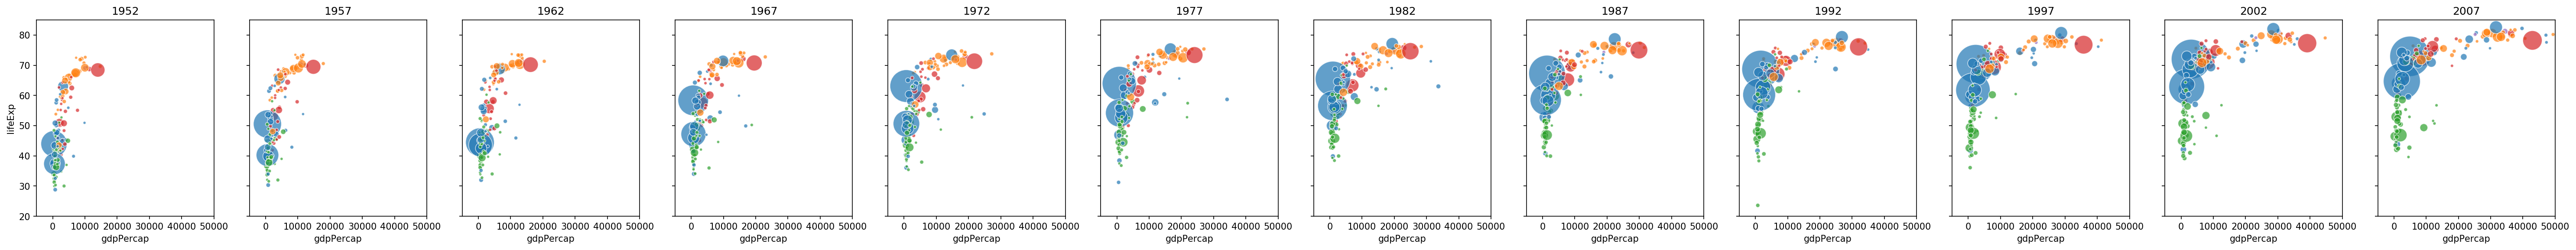

In [21]:
# Make a list of the unique years in this dataset
years = df.index.unique()

# Call the pyplot subplots() function to generate a grid of plots
fig, ax = plt.subplots(1, len(years), figsize=(50,4), sharey=True)
fig.set_dpi(150)
flatax = ax.flatten()

# Loop through the unique years in this dataset
for i, year in enumerate(years):
  
  # select only the data corresponding to this time point
  dfyear = df.loc[year]
  

  # Make a graph of the data for this timepoint
  s = sns.scatterplot(x='gdpPercap'
                      , y='lifeExp'
                      , size='pop'
                      , hue='continent'
                      , data=dfyear
                      , sizes=(10, 3000)
                      , size_norm=(1, 2000000000)
                      , alpha=0.7
                      , ax=flatax[i])
    
  # Configure the x and y limits, remove the legend
  flatax[i].set_xlim(-5000,50000)
  flatax[i].set_ylim(20,85)
  flatax[i].set_title(year)
  s.legend().remove()
  
 

That's also pretty cool!

We can see some trends over time - life expectancy generally increases, and GDP per capita increases **markedly** for some countries but not others. 

But why stop there? Why not create an animation, and stitch all these graphs together to clearly show the change over time?

In [22]:
# Import some extra modules needed for animations
from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc
from IPython.display import HTML

# Make a new figure
figani, ax = plt.subplots()
figani.set_dpi(150)
plt.close() # Don't show the static plot

# Function to generate the first frame of the animation
def init():
    dfstart = df.loc[1952]
    s = sns.scatterplot(x='gdpPercap'
                        , y='lifeExp'
                        , size='pop'
                        , hue='continent'
                        , data=dfstart
                        , sizes=(10, 3000)
                        , size_norm=(1, 2000000000)
                        , alpha=0.7
                        , ax=ax)
    return s
    
# Function to generate the subsequent frame of the animation
def animate(i):
    ax.clear()
    dfyear = df.loc[years[i]]
    s = sns.scatterplot(x='gdpPercap'
                        , y='lifeExp'
                        , size='pop'
                        , hue='continent'
                        , data=dfyear
                        , sizes=(10, 3000)
                        , size_norm=(1, 2000000000)
                        , alpha=0.7
                        , ax=ax)
    ax.set(xlim=(-5000,50000)
           , ylim=(20,85)
           , title=years[i]
           , xlabel='GDP per capita / $'
           , ylabel='Life expectancy / years')
        
    s.legend().remove()
    return s


# Make a FuncAnimation object
anim = FuncAnimation(figani, animate, init_func=init, frames=len(years), interval=600, repeat_delay=3)

# Convert the FuncAnimation object to a video that is viewable in a web browser
HTML(anim.to_html5_video())

# Summary

Clearly, I have copied the concept from Hans Rosling, though perhaps one might quibble with their use of a logarithmic axis for GDP per capita... 
https://www.youtube.com/watch?v=jbkSRLYSojo

While there will be an initial learning curve, hopefully this illustrates these advantages of this toolkit:
- Scalability - you can put in **very** large datasets without causing problems
- Flexibility - the same concepts you learn can be applied to other programming problems
- Generalisability - once you have code that analyses data in a certain way, you can apply similar analyses to different datasets
- Power - you can do some things using these tools that you just cannot otherwise
